In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
import cv2
import glob

Using TensorFlow backend.


In [2]:
img_rows=200
img_cols=200
num_channel=1

In [3]:
img_data_list=[]
file = glob.glob("/home/dong/Picture/data/*.jpg")
for path in file:
    img = cv2.imread(path)
    img = cv2.resize(img, (img_rows, img_cols))
    img_data_list.append(img)
#     cv2.imshow("img", img)
#     cv2.waitKey(0)

img_data = np.array(img_data_list)
np.random.shuffle(img_data)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)
x_train = img_data[:606]
x_test = img_data[606:]
x_train = np.reshape(x_train, (len(x_train), 200, 200, 3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 200, 200, 3))  # adapt this if using `channels_first` image data format

(808, 200, 200, 3)


In [4]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_img = Input(shape=(200, 200, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
print "convo1 shape:", x.shape
x = MaxPooling2D((2, 2), padding='same')(x)
print "pooling1 shape:", x.shape
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
print "convo2 shape:", x.shape
x = MaxPooling2D((2, 2), padding='same')(x)
print "pooling shape:", x.shape
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
print "convo3 shape:", x.shape
encoded = MaxPooling2D((2, 2), padding='same')(x)
print "encode (pooling) shape:", encoded.shape
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
print "convo1 shape:", x.shape
x = UpSampling2D((2, 2))(x)
print "upsam1 shape:", x.shape
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
print "convo2 shape:", x.shape
x = UpSampling2D((2, 2))(x)
print "upsam2 shape:", x.shape
x = Conv2D(64, (1, 1), activation='relu')(x)
print "convo3 shape:", x.shape
x = UpSampling2D((2, 2))(x)
print "upsam3 shape:", x.shape
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
print "decode(convo4) shape:", decoded.shape

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

convo1 shape: (?, 200, 200, 64)
pooling1 shape: (?, 100, 100, 64)
convo2 shape: (?, 100, 100, 32)
pooling shape: (?, 50, 50, 32)
convo3 shape: (?, 50, 50, 32)
encode (pooling) shape: (?, 25, 25, 32)
convo1 shape: (?, 25, 25, 32)
upsam1 shape: (?, 50, 50, 32)
convo2 shape: (?, 50, 50, 32)
upsam2 shape: (?, 100, 100, 32)
convo3 shape: (?, 100, 100, 64)
upsam3 shape: (?, 200, 200, 64)
decode(convo4) shape: (?, 200, 200, 3)


In [5]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=1,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/test')])

Train on 606 samples, validate on 202 samples
Epoch 1/1
606/606 [==============================] - 201s - loss: 0.0578 - acc: 0.4986 - val_loss: 0.0304 - val_acc: 0.5076


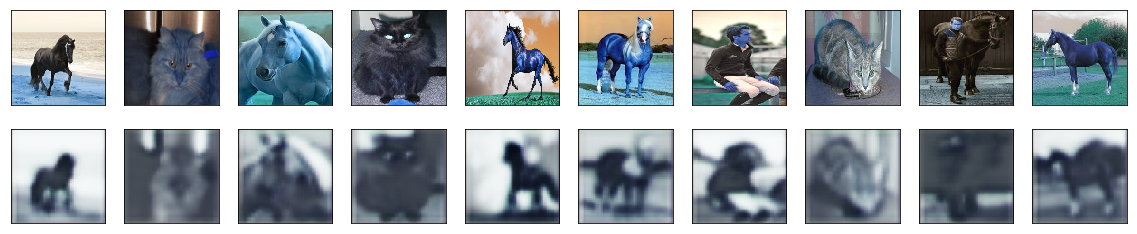

In [6]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(200, 200, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(200, 200, 3))

    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

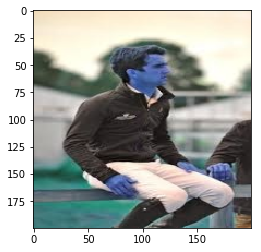

In [7]:
img = np.reshape(x_test[6], (1, 200, 200, 3)) 
predict =  autoencoder.predict(img)
plt.imshow(img.reshape(200, 200, 3))
plt.show()

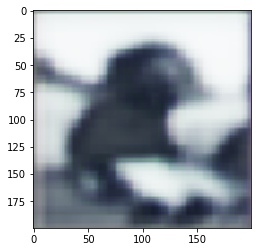

In [8]:
plt.imshow(predict.reshape(200, 200, 3))
plt.show()